Collecting ethical data from the Guardian for testing

In [19]:
import requests
import pandas as pd
import time # To handle delays between requests

API_KEY = 'Personal API Key' # Replace with your API key
BASE_URL = 'https://content.guardianapis.com/search'

def fetch_articles(query, page):
    params = {
    'q': query,
    'api-key': API_KEY,
    'page': page,
    'page-size': 50, # Maximum allowed page size
    'order-by': 'newest',
    'show-fields': 'headline,trailText,bodyText'
    }

    response = requests.get(BASE_URL, params=params)
    data = response.json()
    return data

articles_list = []

query = 'renewable energy'
# Determine the total number of pages
initial_data = fetch_articles(query, 1)
total_pages = initial_data['response']['pages']
# Limit the number of pages to prevent excessive requests
max_pages = min(total_pages, 10) # Adjust as needed

for page in range(1, max_pages + 1):
    print(f"Fetching page {page} of {max_pages}")
data = fetch_articles(query, page)
articles = data['response']['results']

for article in articles:
    article_info = {
    'headline': article['fields'].get('headline', ''),
    'trailText': article['fields'].get('trailText', ''),
    'bodyText': article['fields'].get('bodyText', ''),
    'pub_date': article.get('webPublicationDate', ''),
    'web_url': article.get('webUrl', '')
    }

articles_list.append(article_info)
time.sleep(0.1) # Short delay to respect rate limits

df = pd.DataFrame(articles_list)
df.to_csv('guardian_renewable_energy_articles.csv', index=False)

print("Data collection complete. Saved to 'guardian_renewable_energy_articles.csv'.")

Fetching page 1 of 10
Fetching page 2 of 10
Fetching page 3 of 10
Fetching page 4 of 10
Fetching page 5 of 10
Fetching page 6 of 10
Fetching page 7 of 10
Fetching page 8 of 10
Fetching page 9 of 10
Fetching page 10 of 10
Data collection complete. Saved to 'guardian_renewable_energy_articles.csv'.


Reading the file and converting the df to a string

In [41]:
import pandas as pd

text = pd.read_csv('guardian_renewable_energy_articles.csv')

# Combine text columns into a single string
text_columns = ['headline', 'trailText', 'bodyText']
text = ' '.join(df[col].dropna().astype(str).str.cat(sep=' ') for col in text_columns)

# Now 'text' is a single string with all the content ready for tokenization
print(text[:500])  # Displaying the first 500 characters

Renewable energy scare campaign adds apples and oranges to get $500bn New analysis on the cost of decarbonising Australia’s power grid runs closely to the national market operator’s own – but you wouldn’t know it from the headlines Friday’s front page in Murdoch media’s the Daily Telegraph, declaring a “$500B GREEN HOLE”, could mark the opening salvo of scary claims about the cost of climate action in the run-up to next year’s federal election. Similarly bold claims worked well in the US preside


Cleaning the string text

In [42]:
import re 

# Remove punctuation and special characters
text_cleaned = re.sub(r"[^a-zA-Z\s]", "", text)
# Convert to lowercase
text_cleaned = text_cleaned.lower()
# Remove extra whitespaces
text_cleaned = re.sub(r"\s+", " ", text_cleaned).strip()

print("Cleaned Text:", text_cleaned)

Cleaned Text: renewable energy scare campaign adds apples and oranges to get bn new analysis on the cost of decarbonising australias power grid runs closely to the national market operators own but you wouldnt know it from the headlines fridays front page in murdoch medias the daily telegraph declaring a b green hole could mark the opening salvo of scary claims about the cost of climate action in the runup to next years federal election similarly bold claims worked well in the us presidential election to confound or confuse voters expect a barrage of such reports particularly around contested issues such as energy that bn gap is derived from new analysis by frontier economics the consultancy took the bn sum estimated by the australian energy market operator aemo to be the cost of decarbonising the countrys main power grid by if you dont adjust for inflation you end up with a couple of adjustments with bn and voil theres what the telegraph dubs a half a trilliondollar bombshell sign up 

Sorting out abbreviations

In [43]:
# Expand common abbreviations
abbreviation_mapping = {
    'bn': 'billion',
    'uk': 'united kingdom',
    'us': 'united states',
    'eu': 'european union'
}

for abbr, full_form in abbreviation_mapping.items():
    text_cleaned = text_cleaned.replace(f' {abbr} ', f' {full_form} ')

Tokenization

In [44]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
# Tokenize into words
word_tokens = word_tokenize(text_cleaned)
print("Word Tokens:", word_tokens)

# Tokenize into sentences
sent_tokens = sent_tokenize(text)
print("Sentence Tokens:", sent_tokens)

Word Tokens: ['renewable', 'energy', 'scare', 'campaign', 'adds', 'apples', 'and', 'oranges', 'to', 'get', 'billion', 'new', 'analysis', 'on', 'the', 'cost', 'of', 'decarbonising', 'australias', 'power', 'grid', 'runs', 'closely', 'to', 'the', 'national', 'market', 'operators', 'own', 'but', 'you', 'wouldnt', 'know', 'it', 'from', 'the', 'headlines', 'fridays', 'front', 'page', 'in', 'murdoch', 'medias', 'the', 'daily', 'telegraph', 'declaring', 'a', 'b', 'green', 'hole', 'could', 'mark', 'the', 'opening', 'salvo', 'of', 'scary', 'claims', 'about', 'the', 'cost', 'of', 'climate', 'action', 'in', 'the', 'runup', 'to', 'next', 'years', 'federal', 'election', 'similarly', 'bold', 'claims', 'worked', 'well', 'in', 'the', 'united', 'states', 'presidential', 'election', 'to', 'confound', 'or', 'confuse', 'voters', 'expect', 'a', 'barrage', 'of', 'such', 'reports', 'particularly', 'around', 'contested', 'issues', 'such', 'as', 'energy', 'that', 'billion', 'gap', 'is', 'derived', 'from', 'new'

Stop words:

In [46]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in word_tokens if word not in stop_words]

print("Tokens after Stopword Removal:", filtered_tokens)

Tokens after Stopword Removal: ['renewable', 'energy', 'scare', 'campaign', 'adds', 'apples', 'oranges', 'get', 'billion', 'new', 'analysis', 'cost', 'decarbonising', 'australias', 'power', 'grid', 'runs', 'closely', 'national', 'market', 'operators', 'wouldnt', 'know', 'headlines', 'fridays', 'front', 'page', 'murdoch', 'medias', 'daily', 'telegraph', 'declaring', 'b', 'green', 'hole', 'could', 'mark', 'opening', 'salvo', 'scary', 'claims', 'cost', 'climate', 'action', 'runup', 'next', 'years', 'federal', 'election', 'similarly', 'bold', 'claims', 'worked', 'well', 'united', 'states', 'presidential', 'election', 'confound', 'confuse', 'voters', 'expect', 'barrage', 'reports', 'particularly', 'around', 'contested', 'issues', 'energy', 'billion', 'gap', 'derived', 'new', 'analysis', 'frontier', 'economics', 'consultancy', 'took', 'billion', 'sum', 'estimated', 'australian', 'energy', 'market', 'operator', 'aemo', 'cost', 'decarbonising', 'countrys', 'main', 'power', 'grid', 'dont', 'adj

Lemmatization

In [48]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in filtered_tokens]
print("Stemmed Words:", stemmed_words)

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("Lemmatized Words:", lemmatized_words)

Stemmed Words: ['renew', 'energi', 'scare', 'campaign', 'add', 'appl', 'orang', 'get', 'billion', 'new', 'analysi', 'cost', 'decarbonis', 'australia', 'power', 'grid', 'run', 'close', 'nation', 'market', 'oper', 'wouldnt', 'know', 'headlin', 'friday', 'front', 'page', 'murdoch', 'media', 'daili', 'telegraph', 'declar', 'b', 'green', 'hole', 'could', 'mark', 'open', 'salvo', 'scari', 'claim', 'cost', 'climat', 'action', 'runup', 'next', 'year', 'feder', 'elect', 'similarli', 'bold', 'claim', 'work', 'well', 'unit', 'state', 'presidenti', 'elect', 'confound', 'confus', 'voter', 'expect', 'barrag', 'report', 'particularli', 'around', 'contest', 'issu', 'energi', 'billion', 'gap', 'deriv', 'new', 'analysi', 'frontier', 'econom', 'consult', 'took', 'billion', 'sum', 'estim', 'australian', 'energi', 'market', 'oper', 'aemo', 'cost', 'decarbonis', 'countri', 'main', 'power', 'grid', 'dont', 'adjust', 'inflat', 'end', 'coupl', 'adjust', 'billion', 'voil', 'there', 'telegraph', 'dub', 'half', '

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
# Comparison of stemming and lemmatization for sample words
comparison = pd.DataFrame({
    'Original': filtered_tokens[:50],
    'Stemmed': stemmed_words[:50],
    'Lemmatized': lemmatized_words[:50]
})

print(comparison)

         Original     Stemmed     Lemmatized
0       renewable       renew      renewable
1          energy      energi         energy
2           scare       scare          scare
3        campaign    campaign       campaign
4            adds         add            add
5          apples        appl          apple
6         oranges       orang         orange
7             get         get            get
8         billion     billion        billion
9             new         new            new
10       analysis     analysi       analysis
11           cost        cost           cost
12  decarbonising  decarbonis  decarbonising
13     australias   australia      australia
14          power       power          power
15           grid        grid           grid
16           runs         run            run
17        closely       close        closely
18       national      nation       national
19         market      market         market
20      operators        oper       operator
21        

POS tagging:

In [50]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag, FreqDist


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [51]:
# Part-of-Speech (POS) Tagging
pos_tags = pos_tag(lemmatized_words)
print("POS Tags:", pos_tags[:50])  # Displaying the first 50 POS tagged words


POS Tags: [('renewable', 'JJ'), ('energy', 'NN'), ('scare', 'NN'), ('campaign', 'NN'), ('add', 'VBP'), ('apple', 'NN'), ('orange', 'NN'), ('get', 'VB'), ('billion', 'CD'), ('new', 'JJ'), ('analysis', 'NN'), ('cost', 'NN'), ('decarbonising', 'VBG'), ('australia', 'JJ'), ('power', 'NN'), ('grid', 'NN'), ('run', 'VBP'), ('closely', 'RB'), ('national', 'JJ'), ('market', 'NN'), ('operator', 'NN'), ('wouldnt', 'NN'), ('know', 'VBP'), ('headline', 'NN'), ('friday', 'JJ'), ('front', 'JJ'), ('page', 'NN'), ('murdoch', 'JJ'), ('medias', 'JJ'), ('daily', 'JJ'), ('telegraph', 'NN'), ('declaring', 'VBG'), ('b', 'NN'), ('green', 'JJ'), ('hole', 'NN'), ('could', 'MD'), ('mark', 'VB'), ('opening', 'VBG'), ('salvo', 'JJ'), ('scary', 'JJ'), ('claim', 'NN'), ('cost', 'NN'), ('climate', 'NN'), ('action', 'NN'), ('runup', 'NN'), ('next', 'IN'), ('year', 'NN'), ('federal', 'JJ'), ('election', 'NN'), ('similarly', 'RB')]


In [52]:
# Frequency distribution of POS tags
pos_counts = FreqDist(tag for word, tag in pos_tags)
print("POS Tag Frequency Distribution:")
print(pos_counts.most_common())

# Identifying most common nouns, verbs, adjectives, and adverbs
nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
verbs = [word for word, tag in pos_tags if tag.startswith('VB')]
adjectives = [word for word, tag in pos_tags if tag.startswith('JJ')]
adverbs = [word for word, tag in pos_tags if tag.startswith('RB')]

print("Most Common Nouns:", FreqDist(nouns).most_common(10))
print("Most Common Verbs:", FreqDist(verbs).most_common(10))
print("Most Common Adjectives:", FreqDist(adjectives).most_common(10))
print("Most Common Adverbs:", FreqDist(adverbs).most_common(10))

POS Tag Frequency Distribution:
[('NN', 228), ('JJ', 87), ('RB', 26), ('VBG', 23), ('VBD', 22), ('VBP', 13), ('NNS', 13), ('CD', 12), ('VB', 11), ('IN', 11), ('VBN', 9), ('JJR', 5), ('MD', 4), ('VBZ', 2), ('DT', 2), ('RBR', 2), ('EX', 1), ('NNP', 1), ('WDT', 1), ('PRP', 1)]
Most Common Nouns: [('energy', 10), ('cost', 9), ('report', 6), ('market', 5), ('telegraph', 4), ('inflation', 4), ('australia', 4), ('price', 4), ('power', 3), ('frontier', 3)]
Most Common Verbs: [('said', 8), ('get', 2), ('decarbonising', 2), ('expect', 2), ('took', 2), ('estimated', 2), ('provided', 2), ('finding', 2), ('adjusting', 2), ('add', 1)]
Most Common Adjectives: [('australian', 5), ('guardian', 4), ('frontier', 4), ('nuclear', 4), ('new', 2), ('australia', 2), ('national', 2), ('green', 2), ('federal', 2), ('higher', 2)]
Most Common Adverbs: [('well', 3), ('closely', 2), ('frontier', 2), ('actually', 2), ('also', 2), ('aemo', 2), ('similarly', 1), ('particularly', 1), ('around', 1), ('conveniently', 1)]

Data Visualization and Analysis

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [54]:
# Word Frequency Analysis
word_freq = FreqDist(lemmatized_words)
common_words = word_freq.most_common(20)

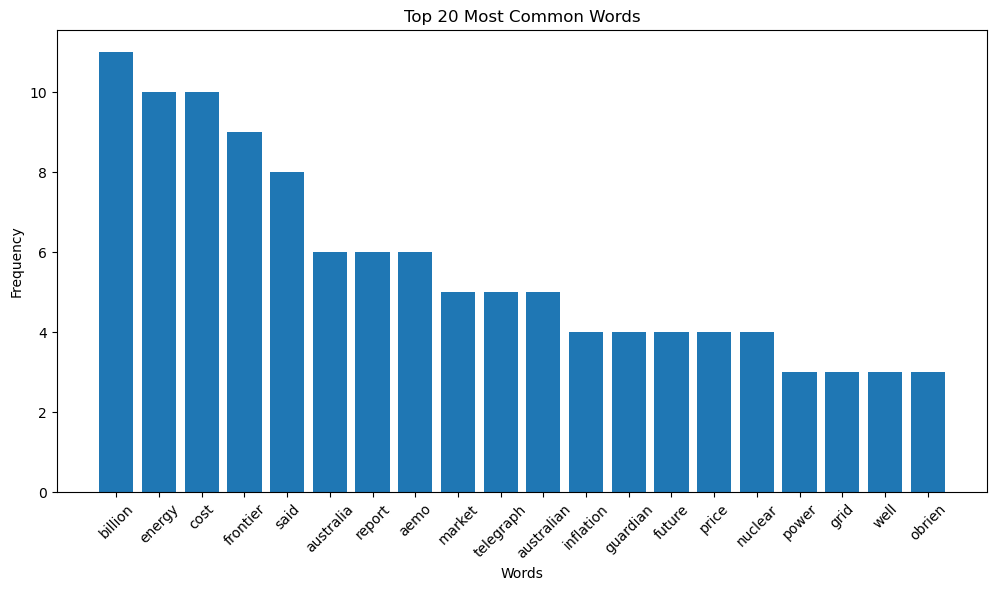

In [55]:
# Visualization: Bar Chart of Most Common Words
plt.figure(figsize=(12, 6))
plt.bar(*zip(*common_words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


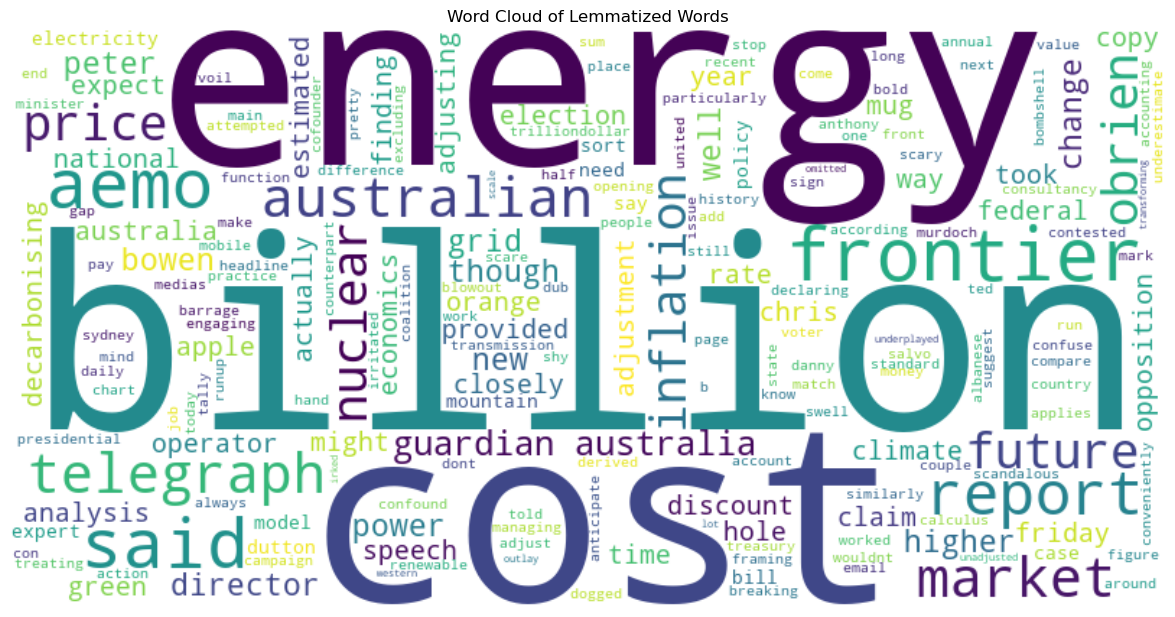

In [56]:
# Visualization: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(lemmatized_words))
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Words')
plt.show()

In [57]:
# Theme Identification
# Display most frequent nouns and verbs as indicative themes
print("Common Themes (Nouns):", FreqDist(nouns).most_common(10))
print("Common Actions (Verbs):", FreqDist(verbs).most_common(10))

Common Themes (Nouns): [('energy', 10), ('cost', 9), ('report', 6), ('market', 5), ('telegraph', 4), ('inflation', 4), ('australia', 4), ('price', 4), ('power', 3), ('frontier', 3)]
Common Actions (Verbs): [('said', 8), ('get', 2), ('decarbonising', 2), ('expect', 2), ('took', 2), ('estimated', 2), ('provided', 2), ('finding', 2), ('adjusting', 2), ('add', 1)]
